# Revision

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 

In [ ]:
xs = np.array([1.0, 2.0, 3.0, 4.0], dtype='float')
ys = np.array([3.0, 6.0, 9.0, 12.0], dtype='float')

In [ ]:
model = tf.keras.Sequential(tf.keras.layers.Dense(input_shape=[1], units=1))

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model.fit(xs, ys, epochs=1000)

In [ ]:
model.layers[0].get_weights()

In [ ]:
weight = model.layers[0].get_weights()[0][0][0]
weight

In [ ]:
bais = model.layers[0].get_weights()[1][0]
bais

In [ ]:
x = 1

In [ ]:
sample_model = weight * x + bais
sample_model

In [ ]:
print(model.predict([2]))

## Introduction to Computer Vision

In [2]:
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9


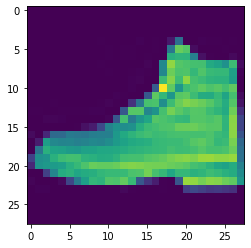

In [6]:
plt.imshow(training_images[50000])
print(training_labels[50000])

In [ ]:
training_images.shape

In [ ]:
test_images.shape

In [ ]:
print(training_images[-1].shape)

## Normalization

In [16]:
training_images[-1].shape

(28, 28)

In [19]:
training_images[-1].reshape(-1,).shape

(784,)

In [7]:
training_images = training_images / 255.0 
test_images = test_images / 255.0 

In [ ]:
28 * 28

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss= 'sparse_categorical_crossentropy') # previously tf.train.AdamOptimizer()

In [10]:
model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5005
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3773
Epoch 3/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3383
Epoch 4/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3147
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2959


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Testing with evaluate method

In [12]:
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3533078853607178

## Training with  Callback

In [23]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if (logs.get('accuracy') > 0.9): 
            print("\nReached 60% accuracy so cancelling training")
            self.model.stop_training = True 

In [24]:
callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
17472/60000 [=======>......................] - ETA: 3s - loss: 0.5904 - accuracy: 0.7912